C:\Users\Student\AppData\Local\Temp\ipykernel_21316\2872090551.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fraud.loc[:,'interval'] = pd.cut(df_fraud['vek'],bins=[24,35,50,65,90,np.inf],labels=['24-34','35-49','50-64','65-89','90+'],right=False,include_lowest=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_21316\2872090551.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agregovano = df_fraud.groupby(by='interval')['interval'].count()


<Axes: ylabel='interval'>

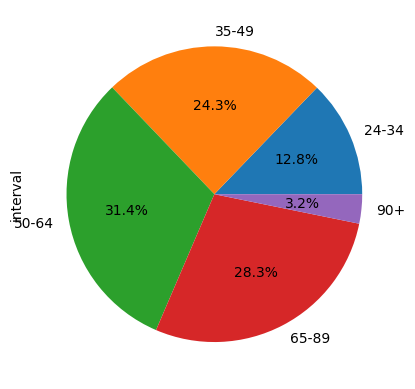

In [31]:
import pandas as pd
from geopy.distance import geodesic
import numpy as np

ted = pd.Timestamp.now()

cesta_souboru = r'C:\Users\Student\Downloads\archive\fraud_data.csv'
df = pd.read_csv(cesta_souboru)

df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'],format="%d-%m-%Y %H:%M")
df['dob'] = pd.to_datetime(df['dob'],format="%d-%m-%Y")
df['vek'] = ted.year - df['dob'].dt.year

df_fraud = df.loc[df['is_fraud'] == '1']
df_fraud.loc[:,'interval'] = pd.cut(df_fraud['vek'],bins=[24,35,50,65,90,np.inf],labels=['24-34','35-49','50-64','65-89','90+'],right=False,include_lowest=True) 
df_agregovano = df_fraud.groupby(by='interval')['interval'].count()
df_agregovano.plot.pie(autopct='%1.1f%%')

In [38]:
df_vzdalenost = df.copy()

df_vzdalenost['lokalita obchodnik'] = list(zip(df_vzdalenost['merch_lat'],df_vzdalenost['merch_long']))
df_vzdalenost['lokalita clovek'] = list(zip(df_vzdalenost['lat'],df_vzdalenost['long']))
df_vzdalenost['vzdalenost'] = df_vzdalenost.apply(lambda x: geodesic(x['lokalita obchodnik'],x['lokalita clovek']).kilometers,axis=1)
df_vzdalenost = df_vzdalenost.sort_values('vzdalenost')
df_vzdalenost['vzdalenost'].unique()

array([  0.63833219,   1.12348146,   1.43370242, ..., 142.30676582,
       142.42409171, 143.47022544])